In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
np.random.seed(40)

In [2]:
data=pd.read_csv('Cardio.csv')

In [3]:
data.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Days
0,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,Guntur,...,40000,Karumuri Hospital,C,GUNTUR,Guntur,14/06/2014 00:00,16/06/2014,NO,D,3
1,49,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Ward-15,Guntur(C),Guntur,...,115846,Karumuri Hospital,C,GUNTUR,Guntur,17/06/2014 00:00,25/06/2014 00:00,NO,D,9
2,54,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Kolakalur,Tenali,Guntur,...,108846,Karumuri Hospital,C,GUNTUR,Guntur,29/07/2014 00:00,08/08/2014,NO,D,11
3,56,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Konduru,Achampeta,Guntur,...,110000,Karumuri Hospital,C,GUNTUR,Guntur,08/05/2014 00:00,14/08/2014 00:00,NO,D,99
4,57,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Govindapuram,Chilakaluripet,Guntur,...,105846,Karumuri Hospital,C,GUNTUR,Guntur,09/03/2014 00:00,09/11/2014,NO,D,246


In [4]:
data.groupby('HOSP_NAME')["Days"].mean()

HOSP_NAME
AAYUSH NRI LEPL HEALTHCARE PVT LTD                                                              39.262399
ADITYA HOSPITALS                                                                                44.000000
AMRUTHA HEART HOSPITAL                                                                          60.519737
ANDHRAHOSPITALSVIJAYAWADAPVTLTD                                                                 35.222836
APOLLO HOSPITALS ENTERPRISE LTD                                                                 60.732704
APOLLO SPECIALITY HOSPITALS NELLORE                                                             60.000000
APPLE HOSPITAL A UNIT OF TANUKU HOSPITAL                                                        43.656522
Alluri Sitarama Raju Academy Of Medical Sciences Asram Hospital                                 36.743363
Anasuya Institute Of Medical Sciences                                                           43.033898
Apollo Hospitals  Secunderabad      

In [5]:
data[data["HOSP_NAME"]=="TULASI HOSPITALS A UNIT OF LIFE SHINE MEDICAL SERVICES PVT LTD"]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Days
235,45,Male,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.3,Coronary Balloon Angioplasty with Drug eluting...,Mannava,Ponnur,Guntur,...,50000,TULASI HOSPITALS A UNIT OF LIFE SHINE MEDICAL ...,C,HYDERABAD,Ranga Reddy,03/05/2016 00:00,03/07/2016,NO,D,62
991,56,Male,ST,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Yadiki,Yadiki,Anantapur,...,115846,TULASI HOSPITALS A UNIT OF LIFE SHINE MEDICAL ...,C,HYDERABAD,Ranga Reddy,07/06/2016 00:00,07/11/2016,NO,D,154


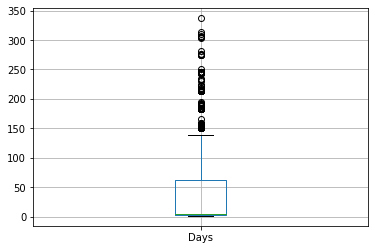

In [6]:
data[data["SURGERY_CODE"]=="S7.1.1.3"].boxplot("Days")

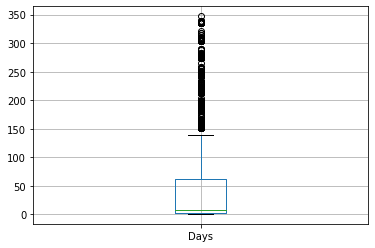

In [7]:
data.boxplot("Days")

(array([2.3839e+04, 4.7880e+03, 2.4470e+03, 1.4800e+03, 8.7800e+02,
        6.6100e+02, 7.4600e+02, 3.0700e+02, 7.8000e+01, 2.2000e+01]),
 array([  1. ,  35.6,  70.2, 104.8, 139.4, 174. , 208.6, 243.2, 277.8,
        312.4, 347. ]),
 <a list of 10 Patch objects>)

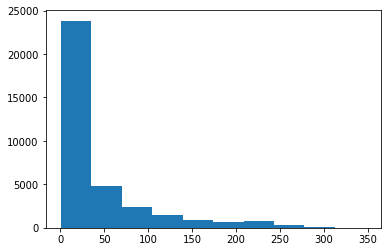

In [8]:
plt.hist(data["Days"])

In [9]:
def binn(df):
    if(df["Days"]<5):
        return(1)
    elif(df["Days"]<10 and df["Days"]>=5):
        return(2)
    elif(df["Days"]<20 and df["Days"]>=10):
        return(3)
    elif(df["Days"]<30 and df["Days"]>=20):
        return(4)
    elif(df["Days"]<40 and df["Days"]>=30):
        return(5)
    elif(df["Days"]<50 and df["Days"]>=40):
        return(6)
    elif(df["Days"]<60 and df["Days"]>=50):
        return(7)
    elif(df["Days"]<80 and df["Days"]>=60):
        return(8)
    elif(df["Days"]<100 and df["Days"]>=80):
        return(9)
    elif(df["Days"]<150 and df["Days"]>=100):
        return(10)
    else:
        return(11)

In [10]:
data["No_of_days(bin)"]=data.apply(binn,axis=1)

In [11]:
data.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Days,No_of_days(bin)
0,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,Guntur,...,Karumuri Hospital,C,GUNTUR,Guntur,14/06/2014 00:00,16/06/2014,NO,D,3,1
1,49,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Ward-15,Guntur(C),Guntur,...,Karumuri Hospital,C,GUNTUR,Guntur,17/06/2014 00:00,25/06/2014 00:00,NO,D,9,2
2,54,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Kolakalur,Tenali,Guntur,...,Karumuri Hospital,C,GUNTUR,Guntur,29/07/2014 00:00,08/08/2014,NO,D,11,3
3,56,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Konduru,Achampeta,Guntur,...,Karumuri Hospital,C,GUNTUR,Guntur,08/05/2014 00:00,14/08/2014 00:00,NO,D,99,9
4,57,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Govindapuram,Chilakaluripet,Guntur,...,Karumuri Hospital,C,GUNTUR,Guntur,09/03/2014 00:00,09/11/2014,NO,D,246,11


(array([1264.,  452.,  676., 1584., 4013., 8924., 9453., 6911., 1810.,
         159.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

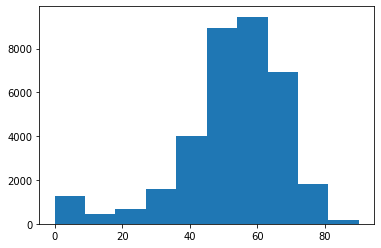

In [12]:
plt.hist(data["AGE"])

In [13]:
data.isnull().sum()

AGE                 0
SEX                 0
CASTE_NAME          0
CATEGORY_CODE       0
CATEGORY_NAME       0
SURGERY_CODE        0
SURGERY             0
VILLAGE             0
MANDAL_NAME         0
DISTRICT_NAME       0
PREAUTH_DATE        0
PREAUTH_AMT         0
CLAIM_DATE          0
CLAIM_AMOUNT        0
HOSP_NAME           0
HOSP_TYPE           0
HOSP_LOCATION       0
HOSP_DISTRICT       0
SURGERY_DATE        0
DISCHARGE_DATE      0
Mortality Y / N     0
SRC_REGISTRATION    0
Days                0
No_of_days(bin)     0
dtype: int64

In [14]:
#data.drop(["CATEGORY_CODE","CATEGORY_NAME"],1,inplace=True)

In [15]:
data.drop(columns="CASTE_NAME",axis=1,inplace=True)

In [16]:
data["DISTRICT_NAME"]

0                Guntur
1                Guntur
2                Guntur
3                Guntur
4                Guntur
5                Guntur
6                Guntur
7                Guntur
8                Guntur
9              Prakasam
10               Guntur
11               Guntur
12              Krishna
13               Guntur
14               Guntur
15               Guntur
16               Guntur
17               Guntur
18               Guntur
19               Guntur
20               Guntur
21               Guntur
22               Guntur
23               Guntur
24               Guntur
25               Guntur
26       Vishakhapatnam
27               Guntur
28        West Godavari
29        West Godavari
              ...      
35216     East Godavari
35217      Vizianagaram
35218      Vizianagaram
35219           Kurnool
35220     East Godavari
35221           Kurnool
35222           Kurnool
35223     East Godavari
35224            Guntur
35225            Guntur
35226     East G

In [17]:
data.columns

Index(['AGE', 'SEX', 'CATEGORY_CODE', 'CATEGORY_NAME', 'SURGERY_CODE',
       'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT', 'HOSP_NAME', 'HOSP_TYPE',
       'HOSP_LOCATION', 'HOSP_DISTRICT', 'SURGERY_DATE', 'DISCHARGE_DATE',
       'Mortality Y / N', 'SRC_REGISTRATION', 'Days', 'No_of_days(bin)'],
      dtype='object')

In [18]:
a=data.groupby(["DISTRICT_NAME","HOSP_DISTRICT"])["Days"].median().reset_index()

In [19]:
a1=data.groupby(["DISTRICT_NAME","HOSP_DISTRICT"])["Days"].mean().reset_index()

In [20]:
a.columns=['DISTRICT_NAME', 'HOSP_DISTRICT', 'Median_Days']

In [21]:
df1=pd.merge(data,a,on=['DISTRICT_NAME', 'HOSP_DISTRICT'],how="left")

In [22]:
df1.columns

Index(['AGE', 'SEX', 'CATEGORY_CODE', 'CATEGORY_NAME', 'SURGERY_CODE',
       'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT', 'HOSP_NAME', 'HOSP_TYPE',
       'HOSP_LOCATION', 'HOSP_DISTRICT', 'SURGERY_DATE', 'DISCHARGE_DATE',
       'Mortality Y / N', 'SRC_REGISTRATION', 'Days', 'No_of_days(bin)',
       'Median_Days'],
      dtype='object')

In [26]:
df1.drop(["VILLAGE","MANDAL_NAME","PREAUTH_DATE"], axis = 1)

,AGE,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,DISTRICT_NAME,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,...,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Days,No_of_days(bin),Median_Days
0,56,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Guntur,40000,17/02/2017 19:21,40000,...,C,GUNTUR,Guntur,14/06/2014 00:00,16/06/2014,NO,D,3,1,6.0
1,49,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Guntur,115846,17/02/2017 19:21,115846,...,C,GUNTUR,Guntur,17/06/2014 00:00,25/06/2014 00:00,NO,D,9,2,6.0
2,54,Female,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Guntur,115846,17/02/2017 19:22,108846,...,C,GUNTUR,Guntur,29/07/2014 00:00,08/08/2014,NO,D,11,3,6.0
3,56,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Guntur,115846,17/02/2017 19:22,110000,...,C,GUNTUR,Guntur,08/05/2014 00:00,14/08/2014 00:00,NO,D,99,9,6.0
4,57,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Guntur,115846,17/02/2017 19:21,105846,...,C,GUNTUR,Guntur,09/03/2014 00:00,09/11/2014,NO,D,246,11,6.0
5,53,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Guntur,40000,17/02/2017 19:22,40000,...,C,GUNTUR,Guntur,19/09/2014 00:00,22/09/2014 00:00,NO,D,4,1,6.0
6,54,Female,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Guntur,49000,17/02/2017 19:21,40000,...,C,GUNTUR,Guntur,22/09/2014 00:00,24/09/2014 00:00,NO,D,3,1,6.0
7,54,Female,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.2,PTCA 1 Additional Stent (00.46),Guntur,49000,17/02/2017 19:21,40000,...,C,GUNTUR,Guntur,22/09/2014 00:00,24/09/2014 00:00,NO,D,3,1,6.0
8,59,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Guntur,40000,17/02/2017 19:21,40000,...,C,GUNTUR,Guntur,10/07/2014 00:00,10/11/2014,NO,D,124,10,6.0
9,65,Male,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Prakasam,115846,17/02/2017 19:22,115846,...,C,GUNTUR,Guntur,10/10/2014 00:00,18/10/2014 00:00,NO,D,9,2,5.0


In [ ]:
df1.iloc[:,6:]

In [ ]:
group_country_orders = df1.groupby("SURGERY")['Days'].mean().sort_values().tail(25)
plt.subplots(figsize=(26,15))
group_country_orders.plot('barh', fontsize=32)
plt.xlabel('mean', fontsize=12)
plt.ylabel('surgery', fontsize=22)
plt.title('Numb', fontsize=12)
plt.show()

In [ ]:
plt.scatter(df1["Days"],df1["CLAIM_AMOUNT"])

In [ ]:
group_country_orders = df1.groupby("HOSP_NAME")['Days'].max().sort_values().tail(25)
plt.subplots(figsize=(8,6))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('mean', fontsize=12)
plt.ylabel('surgery', fontsize=12)
plt.title('Numb', fontsize=12)
plt.show()

In [ ]:
class1 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 1]
class2 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 2]
class3 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 3]
class4 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 4]
class5 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 5]
class6 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 6]
class7 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 7]
class8 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 8]
class9 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 9]
class10 = df1["No_of_days(bin)"][df1["No_of_days(bin)"] == 10]
# get average and std for fare of survived/not survived passengers
av= DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [ ]:
# .... continue with plot Age column
import seaborn as sns
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(df1, hue="No_of_days(bin)",aspect=4)
facet.map(sns.kdeplot,'CLAIM_AMOUNT',shade= True)
facet.set(xlim=(0, df1['CLAIM_AMOUNT'].mean()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df1[["CLAIM_AMOUNT", "No_of_days(bin)"]].groupby(['No_of_days(bin)'],as_index=False).mean()
sns.barplot(x='CLAIM_AMOUNT', y='No_of_days(bin)', data=average_age)

In [ ]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().iplot(kind='bar')

In [ ]:
df1.boxplot('CLAIM_AMOUNT','No_of_days(bin)');

In [ ]:
pd.crosstab(df1['HOSP_TYPE'], df1['No_of_days(bin)']).plot(kind="bar")

In [ ]:
pd.crosstab(df1['Mortality Y / N'], df1['No_of_days(bin)']).plot(kind="bar")

In [ ]:

pd.crosstab(df1['SRC_REGISTRATION'], df1['No_of_days(bin)']).plot(kind="bar")

In [ ]:
df2=df1.drop(["VILLAGE","CLAIM_AMOUNT","SURGERY_CODE","MANDAL_NAME","Mortality Y / N","DISTRICT_NAME","Median_Days","PREAUTH_DATE","CLAIM_DATE","HOSP_LOCATION","HOSP_DISTRICT","SURGERY_DATE","DISCHARGE_DATE"],1)

In [ ]:
df2.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data1 = df2.apply(le.fit_transform)

In [ ]:
data1.head()

In [ ]:
X=data1.drop(["Days","No_of_days(bin)"],1)
y=data1["No_of_days(bin)"]
y1=data1["Days"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=45)




In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1, test_size=0.30, random_state=45)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestClassifier(n_estimators=150,max_depth=12)
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf=RandomForestRegressor(n_estimators=150,max_depth=12)
rf.fit(X_train1,y_train1)

In [ ]:
rf.score(X_test1,y_test1)